### 4. Column Independence Analyzation

One of assumption made for linear regression model was $X$ column data are independent to each other. Only $Y$ column data is dependent data. In our case $Y$ is price. Now we need to test the independency of $X$ columns. First, we needed load training data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
df = pd.read_csv('TrainingData.csv')
df

,Unnamed: 0,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Turbo,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,NaN,186005,6,Automatic,Front-Rear,4-5,Left wheel,Silver,12
1,1,44731507,16621,1018,CHEVROLET,EQUINOX,2011,Jeep,No,Petrol,3.0,NaN,192000,6,Tiptronic,Front-Rear,4-5,Left wheel,Black,8
2,2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,NaN,200000,4,Variator,Front,4-5,Right-hand drive,Black,2
3,3,45769185,3607,862,FORD,ESCAPE,2011,Jeep,Yes,Hybrid,2.5,NaN,168966,4,Automatic,Front-Rear,4-5,Left wheel,White,0
4,4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,NaN,91901,4,Automatic,Front,4-5,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13448,13462,45802417,21103,1104,HYUNDAI,GRANDEUR,2015,Sedan,Yes,LPG,3.0,NaN,273249,4,Automatic,Front,4-5,Left wheel,Black,4
13449,13463,44631202,13172,530,HYUNDAI,ELANTRA,2013,Sedan,Yes,Petrol,1.6,NaN,75000,4,Tiptronic,Front,4-5,Left wheel,White,8
13450,13464,45669073,19757,353,TOYOTA,PRIUS,2015,Hatchback,No,Hybrid,1.8,NaN,105000,4,Automatic,Front,4-5,Left wheel,Silver,8
13451,13465,45647811,1019,917,BMW,X5,2013,Jeep,Yes,Diesel,3.0,NaN,137802,6,Automatic,Front-Rear,4-5,Left wheel,Black,0


We know that there are different type data in the training data set. We have to analyze them in following 3 different ways.

#### 4.1 Heat Map for Columns With Digit Data

Now let's seperate the data frame and creat a new data frame ddf encoding as "Digit Data Frame".

In [2]:
ddf = df[['Price','Levy', 'Prod_year', 'Engine_volume', 'Mileage', 'Cylinders', 'Airbags']]
ddf

,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Airbags
0,13328,1399,2010,3.5,186005,6,12
1,16621,1018,2011,3.0,192000,6,8
2,8467,0,2006,1.3,200000,4,2
3,3607,862,2011,2.5,168966,4,0
4,11726,446,2014,1.3,91901,4,4
...,...,...,...,...,...,...,...
13448,21103,1104,2015,3.0,273249,4,4
13449,13172,530,2013,1.6,75000,4,8
13450,19757,353,2015,1.8,105000,4,8
13451,1019,917,2013,3.0,137802,6,0


In [3]:
# find correlation numbers
ddf.corr()

,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Airbags
Price,1.000000,0.043694,0.287841,0.130153,-0.017634,0.104799,-0.019300
Levy,0.043694,1.000000,0.381583,0.375368,-0.026169,0.241199,0.126134
Prod_year,0.287841,0.381583,1.000000,-0.034592,-0.069824,-0.099391,0.238808
Engine_volume,0.130153,0.375368,-0.034592,1.000000,-0.012121,0.782648,0.225086
Mileage,-0.017634,-0.026169,-0.069824,-0.012121,1.000000,-0.009870,-0.006051
Cylinders,0.104799,0.241199,-0.099391,0.782648,-0.009870,1.000000,0.170400
Airbags,-0.019300,0.126134,0.238808,0.225086,-0.006051,0.170400,1.000000


<AxesSubplot:>

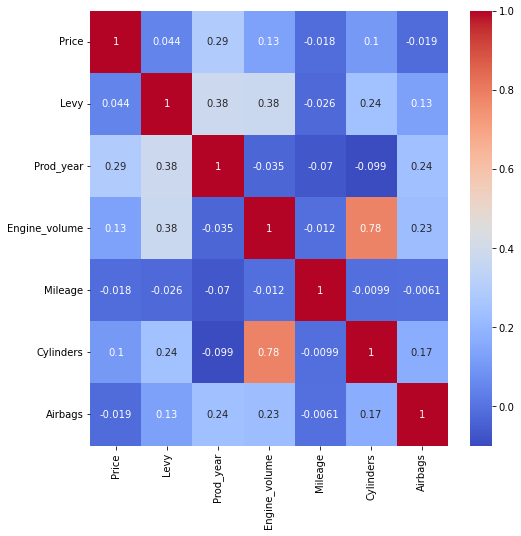

In [4]:
# plot heat map base on the correlation numbers
plt.figure(figsize=(8,8))
sns.heatmap(ddf.corr(), annot=True, cmap='coolwarm')

We can see that base on the heat map most columns are good with indenpendency. Only exception is column Engine_volume and Cylinders. Which it makes alot sense that when Engine_vlume increase the Cylinders will increase too.

#### 4.2 Analyze the Categorical Variable Column with Heat-Map-like Plot

We cannot get correlation number from corr() function in the Pandas dataframe to create heat Map. However, we can pivot the data apparance to compare two categorical variable columns. When data appare only in one row and one column for majority of data in two columns. We can see the dependency of the two categorical variable column. We need to load categorical variable only column to a new data frame "cdf" as categorical data frame.

In [5]:
cdf = df[['Manufacturer','Model', 'Category', 'Leather_interior', 'Fuel_type', 'Gear_box_type', 'Drive_wheels', 'Doors', 'Wheel', 'Color']]
cdf

,Manufacturer,Model,Category,Leather_interior,Fuel_type,Gear_box_type,Drive_wheels,Doors,Wheel,Color
0,LEXUS,RX 450,Jeep,Yes,Hybrid,Automatic,Front-Rear,4-5,Left wheel,Silver
1,CHEVROLET,EQUINOX,Jeep,No,Petrol,Tiptronic,Front-Rear,4-5,Left wheel,Black
2,HONDA,FIT,Hatchback,No,Petrol,Variator,Front,4-5,Right-hand drive,Black
3,FORD,ESCAPE,Jeep,Yes,Hybrid,Automatic,Front-Rear,4-5,Left wheel,White
4,HONDA,FIT,Hatchback,Yes,Petrol,Automatic,Front,4-5,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...,...
13448,HYUNDAI,GRANDEUR,Sedan,Yes,LPG,Automatic,Front,4-5,Left wheel,Black
13449,HYUNDAI,ELANTRA,Sedan,Yes,Petrol,Tiptronic,Front,4-5,Left wheel,White
13450,TOYOTA,PRIUS,Hatchback,No,Hybrid,Automatic,Front,4-5,Left wheel,Silver
13451,BMW,X5,Jeep,Yes,Diesel,Automatic,Front-Rear,4-5,Left wheel,Black


##### 4.2.1 Manufacturer vs Model

In [11]:
# Training Data Frame is too large, let try first 50
cdf1 = cdf.head(50)
# count the Manufacturer and Model data apparence
cdf_counts = cdf1.groupby(['Manufacturer', 'Model']).size()
cdf_counts = cdf_counts.reset_index(name = 'count')
# pivate the data
cdf_counts = cdf_counts.pivot(index = 'Model', columns = 'Manufacturer', values = 'count')
cdf_counts

Manufacturer,BMW,CHEVROLET,FORD,HONDA,HYUNDAI,JEEP,LEXUS,MERCEDES-BENZ,OPEL,PORSCHE,TOYOTA,VOLKSWAGEN
Model,,,,,,,,,,,,
AQUA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
CAMRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
CAYENNE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
CHR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
CHR LIMITED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
E 220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
E 350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
ELANTRA,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EQUINOX,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Manufacturer', ylabel='Model'>

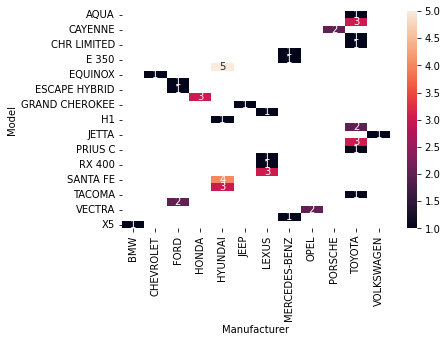

In [12]:
#plot heat map
sns.heatmap(cdf_counts, annot = True)

We can see that the data apperance on the row of model is depend on the manufacturer. This is normal, as model normally is manufacturer trade mark, they are only depend on manufacturer. For example, when Tesla first time create the Model 3 cars, the idea was use Model E. However, Model E is trade mark of Ford. That is why Tesla is using Model 3. Solution of handling of the data is in section 4.5

##### 4.2.2 Manufacturer vs Category

In [16]:
# count the Manufacturer and Category data apparence
cdf_counts = cdf.groupby(['Manufacturer', 'Category']).size()
cdf_counts = cdf_counts.reset_index(name = 'count')
# pivate the data
cdf_counts = cdf_counts.pivot(index = 'Category', columns = 'Manufacturer', values = 'count')
cdf_counts

Manufacturer,ACURA,ALFA ROMEO,ASTON MARTIN,AUDI,BENTLEY,BMW,BUICK,CADILLAC,CHEVROLET,CHRYSLER,...,SSANGYONG,SUBARU,SUZUKI,TESLA,TOYOTA,UAZ,VAZ,VOLKSWAGEN,VOLVO,ZAZ
Category,,,,,,,,,,,,,,,,,,,,,
Cabriolet,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coupe,NaN,1.0,1.0,9.0,1.0,61.0,NaN,1.0,8.0,2.0,...,NaN,1.0,NaN,NaN,16.0,1.0,NaN,4.0,2.0,1.0
Goods wagon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN
Hatchback,NaN,1.0,NaN,23.0,NaN,14.0,NaN,NaN,122.0,2.0,...,NaN,14.0,13.0,NaN,830.0,NaN,1.0,59.0,NaN,NaN
Jeep,4.0,NaN,NaN,44.0,NaN,300.0,3.0,3.0,212.0,NaN,...,302.0,108.0,28.0,NaN,453.0,6.0,12.0,18.0,4.0,NaN
Limousine,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Microbus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,2.0,NaN,3.0,NaN,NaN
Minivan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,1.0,NaN,NaN,NaN,47.0,NaN,NaN,7.0,NaN,NaN
Pickup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,9.0,1.0,NaN,1.0,NaN,NaN


<AxesSubplot:xlabel='Manufacturer', ylabel='Category'>

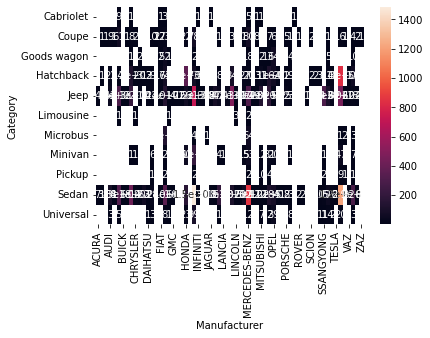

In [17]:
#plot heat map
sns.heatmap(cdf_counts, annot = True)

Unlike the 4.2.1 Manufacturer vs Model, Manufacturer vs Category showing independence as categoery data appearance is distribute every where across manufacturer. This is normal, because manufacturer cannot trade mark car category. All manufacturer can make any category of cars as they like.

##### 4.2.3 Manufacturer vs Fuel Type

In [18]:
# count the Manufacturer and Fuel Type data apparence
cdf_counts = cdf.groupby(['Manufacturer', 'Fuel_type']).size()
cdf_counts = cdf_counts.reset_index(name = 'count')
# pivate the data
cdf_counts = cdf_counts.pivot(index = 'Fuel_type', columns = 'Manufacturer', values = 'count')
cdf_counts

Manufacturer,ACURA,ALFA ROMEO,ASTON MARTIN,AUDI,BENTLEY,BMW,BUICK,CADILLAC,CHEVROLET,CHRYSLER,...,SSANGYONG,SUBARU,SUZUKI,TESLA,TOYOTA,UAZ,VAZ,VOLKSWAGEN,VOLVO,ZAZ
Fuel_type,,,,,,,,,,,,,,,,,,,,,
CNG,NaN,NaN,NaN,2.0,NaN,19.0,NaN,1.0,NaN,NaN,...,NaN,12.0,4.0,NaN,15.0,2.0,2.0,31.0,NaN,NaN
Diesel,NaN,NaN,NaN,13.0,NaN,172.0,NaN,NaN,188.0,NaN,...,283.0,NaN,1.0,NaN,37.0,NaN,NaN,66.0,NaN,NaN
Hybrid,NaN,NaN,NaN,2.0,NaN,6.0,NaN,NaN,77.0,NaN,...,NaN,13.0,NaN,NaN,1507.0,NaN,NaN,5.0,NaN,NaN
Hydrogen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LPG,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,12.0,1.0,...,NaN,5.0,1.0,NaN,26.0,NaN,NaN,5.0,NaN,NaN
Petrol,11.0,3.0,1.0,150.0,2.0,506.0,9.0,11.0,444.0,19.0,...,38.0,163.0,53.0,1.0,1007.0,8.0,33.0,284.0,12.0,1.0
Plug-in Hybrid,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,31.0,NaN,...,NaN,1.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Manufacturer', ylabel='Fuel_type'>

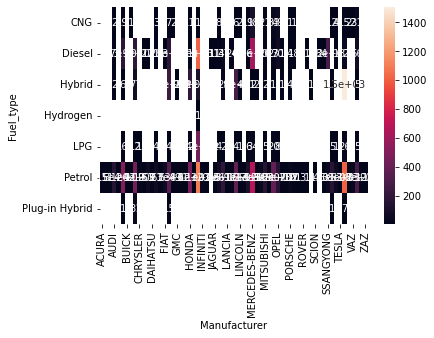

In [19]:
#plot heat map
sns.heatmap(cdf_counts, annot = True)

Same to 4.2.2 Manufacturer vs Category, Manufactuer vs Fuel Type is also showing independency of the fuel type with one exception of Hydrogen. Looks like we don't have enough traning data for the Hydrogen type. This could lead to large error during the training the model at Hydrogen fuel type.

##### 4.2.4 Manufacturer vs Gear Box Type

In [21]:
# count the Manufacturer and Fuel Type data apparence
cdf_counts = cdf.groupby(['Manufacturer', 'Gear_box_type']).size()
cdf_counts = cdf_counts.reset_index(name = 'count')
# pivate the data
cdf_counts = cdf_counts.pivot(index = 'Gear_box_type', columns = 'Manufacturer', values = 'count')
cdf_counts

Manufacturer,ACURA,ALFA ROMEO,ASTON MARTIN,AUDI,BENTLEY,BMW,BUICK,CADILLAC,CHEVROLET,CHRYSLER,...,SSANGYONG,SUBARU,SUZUKI,TESLA,TOYOTA,UAZ,VAZ,VOLKSWAGEN,VOLVO,ZAZ
Gear_box_type,,,,,,,,,,,,,,,,,,,,,
Automatic,11.0,NaN,NaN,100.0,1.0,271.0,8.0,11.0,664.0,14.0,...,321.0,117.0,36.0,1.0,1976.0,NaN,NaN,128.0,7.0,NaN
Manual,NaN,2.0,NaN,11.0,NaN,89.0,NaN,1.0,14.0,1.0,...,NaN,11.0,16.0,NaN,40.0,10.0,34.0,119.0,2.0,1.0
Tiptronic,NaN,1.0,1.0,55.0,1.0,360.0,1.0,NaN,69.0,5.0,...,NaN,53.0,4.0,NaN,284.0,NaN,1.0,144.0,3.0,NaN
Variator,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,13.0,3.0,NaN,299.0,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Manufacturer', ylabel='Gear_box_type'>

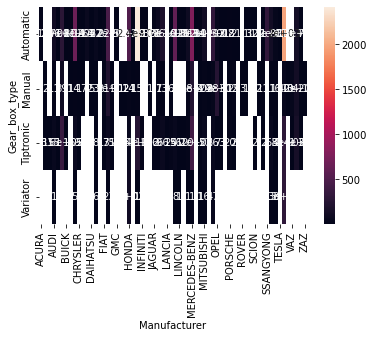

In [22]:
#plot heat map
sns.heatmap(cdf_counts, annot = True)

We can see the gear box type has distribute on more than one manufacturer. This show the independency of these two columns.

##### 4.2.5 Category vs Wheel

In [25]:
# count the Category and Wheel data apparence
cdf_counts = cdf.groupby(['Category', 'Wheel']).size()
cdf_counts = cdf_counts.reset_index(name = 'count')
# pivate the data
cdf_counts = cdf_counts.pivot(index = 'Wheel', columns = 'Category', values = 'count')
cdf_counts

Category,Cabriolet,Coupe,Goods wagon,Hatchback,Jeep,Limousine,Microbus,Minivan,Pickup,Sedan,Universal
Wheel,,,,,,,,,,,
Left wheel,24.0,357.0,156.0,1473.0,3727.0,8.0,200.0,328.0,33.0,5870.0,217.0
Right-hand drive,NaN,19.0,11.0,525.0,105.0,NaN,5.0,134.0,1.0,224.0,36.0


<AxesSubplot:xlabel='Category', ylabel='Wheel'>

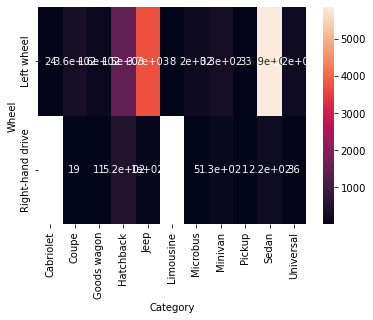

In [26]:
#plot heat map
sns.heatmap(cdf_counts, annot = True)

We can see heat map has showing the clearly independency for Category vs Wheel

##### 4.2.6 Fuel Type vs Wheel

In [27]:
# count the Fuel type and Wheel data apparence
cdf_counts = cdf.groupby(['Fuel_type', 'Wheel']).size()
cdf_counts = cdf_counts.reset_index(name = 'count')
# pivate the data
cdf_counts = cdf_counts.pivot(index = 'Wheel', columns = 'Fuel_type', values = 'count')
cdf_counts

Fuel_type,CNG,Diesel,Hybrid,Hydrogen,LPG,Petrol,Plug-in Hybrid
Wheel,,,,,,,
Left wheel,280.0,2785.0,2276.0,1.0,563.0,6434.0,54.0
Right-hand drive,62.0,25.0,212.0,NaN,50.0,710.0,1.0


<AxesSubplot:xlabel='Fuel_type', ylabel='Wheel'>

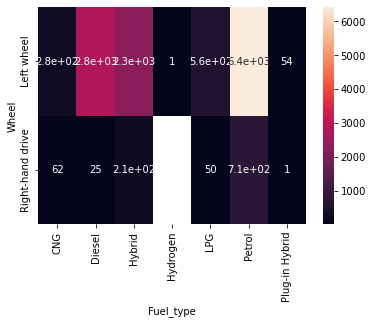

In [28]:
#plot heat map
sns.heatmap(cdf_counts, annot = True)

We can see heat map has showing the clearly independency for Fuel Type vs Wheel

#### 4.3 Analyze the Categorical Variable Column with Digit Variable Column

Now we have to analyze the categorical variable column with regular digit variable column. We are using box plot to analyze these different type data column indenpendency.

##### 4.3.1 Production Year vs Gear Box Type

<AxesSubplot:xlabel='Gear_box_type', ylabel='Prod_year'>

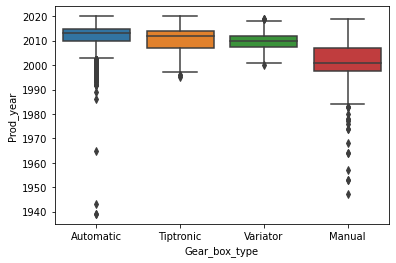

In [30]:
sns.boxplot(y='Prod_year',x="Gear_box_type", data=df)

From the box plot we can see that production year and gear box type are indenpendent, because one production year can have more than one gear box type. Gear box type are not year specific in the morjorty of the data.

##### 4.3.2 Production Year vs Model Type

<AxesSubplot:xlabel='Model', ylabel='Prod_year'>

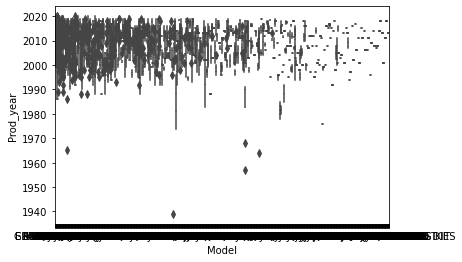

In [31]:
sns.boxplot(y='Prod_year',x="Model", data=df)

From the box plot we can see that production year and model are indenpendent, because one production year can have more than one model made. Car models are not year specific in the morjorty case of the data.

#### 4.4 Special Case of Engine Volume with Turbo Column

When we first time processing the data, we have seperate the Engine Volumn with/with-out Turbo. And we have created Turbo as new column for easy processing. Then we know Turbo is dependent to Engine Volumn. We need to find way to combine the Turbo column back to Engine Volume column. We will use group mean to calculate the coefficient of car has Turbo and not has Turbo.

$X_{EngineVolue}(\hat \theta X_{Turbo})$

In [36]:
#replace null data with 0
df['Turbo']=df['Turbo'].fillna(0)
#set a new data frame with Price Engine_volume and Turbo
tdf= df[['Price','Engine_volume','Turbo']]
tdf

,Price,Engine_volume,Turbo
0,13328,3.5,0
1,16621,3.0,0
2,8467,1.3,0
3,3607,2.5,0
4,11726,1.3,0
...,...,...,...
13448,21103,3.0,0
13449,13172,1.6,0
13450,19757,1.8,0
13451,1019,3.0,0


In [37]:
#drop non turbo
tdf = tdf.drop(tdf[tdf.Turbo == 0].index)
tdf

,Price,Engine_volume,Turbo
23,7840,2.0,Turbo
25,20385,2.2,Turbo
30,15681,2.0,Turbo
34,24462,3.0,Turbo
42,20165,1.4,Turbo
...,...,...,...
13403,21639,2.4,Turbo
13415,11917,1.4,Turbo
13431,16621,2.0,Turbo
13432,17249,2.0,Turbo


In [39]:
#create data frame with non turbo car
ntdf = df[['Price','Engine_volume','Turbo']]
ntdf = ntdf.drop(ntdf[ntdf.Turbo == "Turbo"].index)
ntdf

,Price,Engine_volume,Turbo
0,13328,3.5,0
1,16621,3.0,0
2,8467,1.3,0
3,3607,2.5,0
4,11726,1.3,0
...,...,...,...
13448,21103,3.0,0
13449,13172,1.6,0
13450,19757,1.8,0
13451,1019,3.0,0


In [50]:
#calcuate Theta hat
withturbopricemean = tdf['Price'].mean()
withoutturbopricemean = ntdf['Price'].mean()
Thetahat = withturbopricemean/withoutturbopricemean
print("\\u02c6\u0398 is", Thetahat)

Θˆ is 1.7554345902046502
